In [1]:
import uproot4
import awkward1 as ak
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import                                                                                                                  
import mplhep as hep
plt.style.use(hep.style.ROOT)
import os,sys
import pandas as pd
from scipy.stats import halfnorm

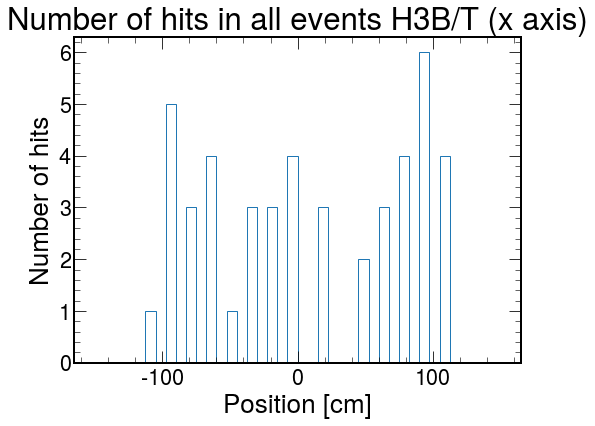

10
[8, 8, 7, 7, 6, 3, 3, 2, 1, 1]


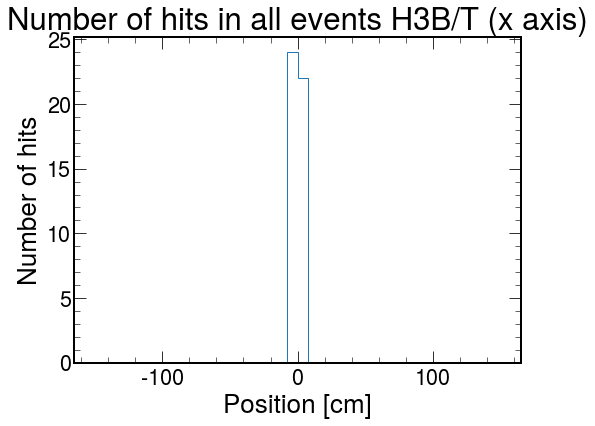

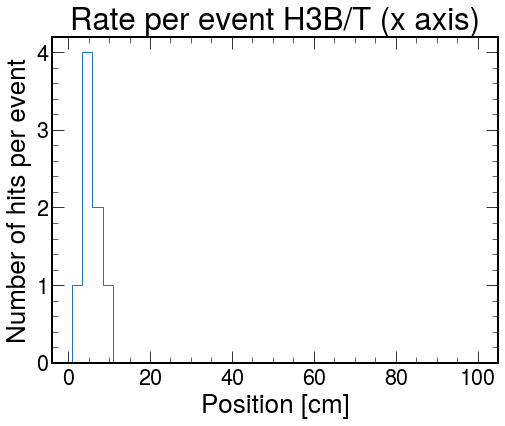

In [24]:
root = uproot4.open("track_028636_r1.7.0.root:save/rawEvent")
aktree = root.arrays(["fTriggerBits","fAllHits.pos","fAllHits.driftDistance","fAllHits.detectorID"],library="ak", how="zip")

# mask w. triggerBits &(32|128)
trigmask = (aktree.fTriggerBits == 67)
trigmask = trigmask | (aktree.fTriggerBits == 65)

allhits = aktree.fAllHits
maskedhits = ak.mask(allhits,trigmask)

detid_dict = {'H3':[39,40],
             }

# select detector
def detectorRange(arr, detid1, detid2):
    mask = (arr.detectorID >= detid1)
    mask = mask & (arr.detectorID <= detid2) 
    return mask

def detectorSelection(arr, detid):
    mask = (arr.detectorID== detid)
    return mask

# build detector mask
def detectorMask(arr):
    detmask = {}
    for key,item in detid_dict.items():
        if len(item)==1:
            detmask[key] = detectorSelection(arr,item[0])
        else:
            detmask[key] = detectorRange(arr,item[0],item[1])
    return detmask

detmask = detectorMask(allhits)

for det in detmask.keys():
    maskedhits_det = maskedhits[detmask[det]]
    numpos = ak.num(maskedhits_det.pos)
    
    fig = plt.figure(figsize=(8,6))
    plt.hist(ak.flatten(maskedhits_det.pos), bins=40, range=(-150,150), histtype='step', density=False)
    plt.ylabel("Number of hits")
    plt.xlabel("Position [cm]")
    plt.title("Number of hits in all events H3B/T (x axis)")
    plt.savefig("positionNhits_h3bt.png")
    plt.show()

    nhits_allevts = ak.count(maskedhits_det.pos) # or len(np.array(ak.flatten(maskedhits_det.pos)))
    nhits_inevt123 = ak.count(maskedhits_det.pos, axis=-1)[123]
    print(ak.count(maskedhits_det.pos[123]))
    print(ak.count(maskedhits_det.pos, axis=0))
    fig = plt.figure(figsize=(8,6))
    plt.hist(ak.flatten(maskedhits_det.pos)/len(np.array(ak.flatten(maskedhits_det.pos))), bins=40, range=(-150,150), histtype='step', density=False)
    plt.ylabel("Number of hits")
    plt.xlabel("Position [cm]")
    plt.title("Number of hits in all events H3B/T (x axis)")
    plt.savefig("positionNhitsdiv_h3bt.png")
    plt.show()
    
    # start from 1 so that you exclude 0
    fig = plt.figure(figsize=(8,6))
    plt.hist(ak.fill_none(numpos,0), bins=40, range=(1,100), histtype='step', density=False)
    plt.ylabel("Number of hits per event")
    plt.xlabel("Position [cm]")
    plt.title("Rate per event H3B/T (x axis)")
    plt.savefig("positionRate_h3bt.png")
    plt.show()
